# Titanic Survival prediction

### Importing neccesary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

## Data loading and Inspection:

In [2]:
# Load the dataset
titanic_df = pd.read_csv("tested.csv")

In [3]:
#Checking the first 5 Rows and columns:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
print("Duplicates in the dataset:", titanic_df.duplicated().sum())

Duplicates in the dataset: 0


In [6]:
titanic_df.shape

(418, 12)

In [7]:
#Checking missing values:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Display summary statistics
print(titanic_df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


## Exploratory data analysis(EDA)

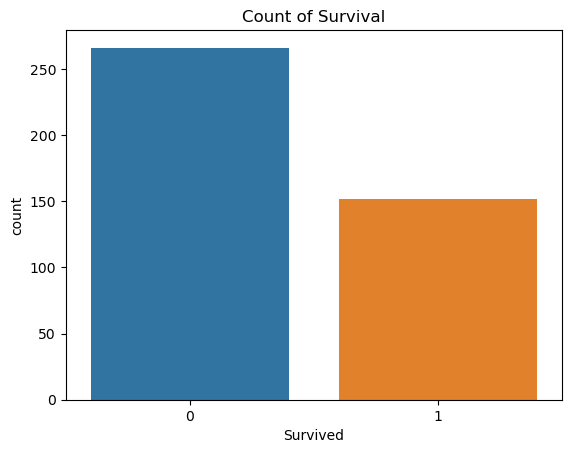

In [9]:
# Survival count
sns.countplot(data=titanic_df, x='Survived')
plt.title('Count of Survival')
plt.show()


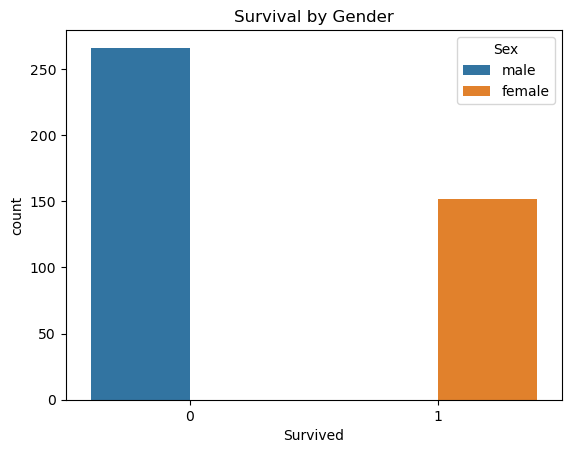

In [10]:
# Survival by gender
sns.countplot(data=titanic_df, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()


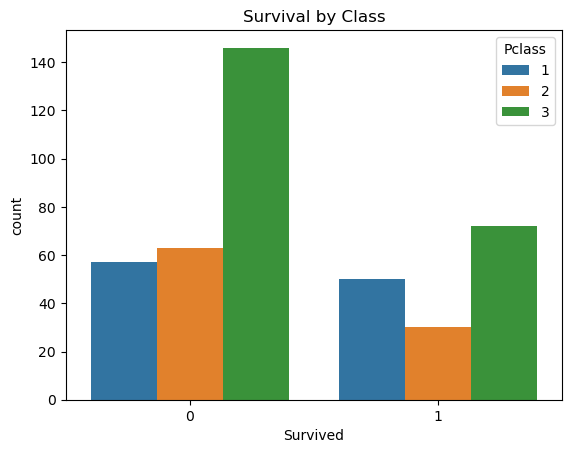

In [11]:
# Survival by class
sns.countplot(data=titanic_df, x='Survived', hue='Pclass')
plt.title('Survival by Class')
plt.show()


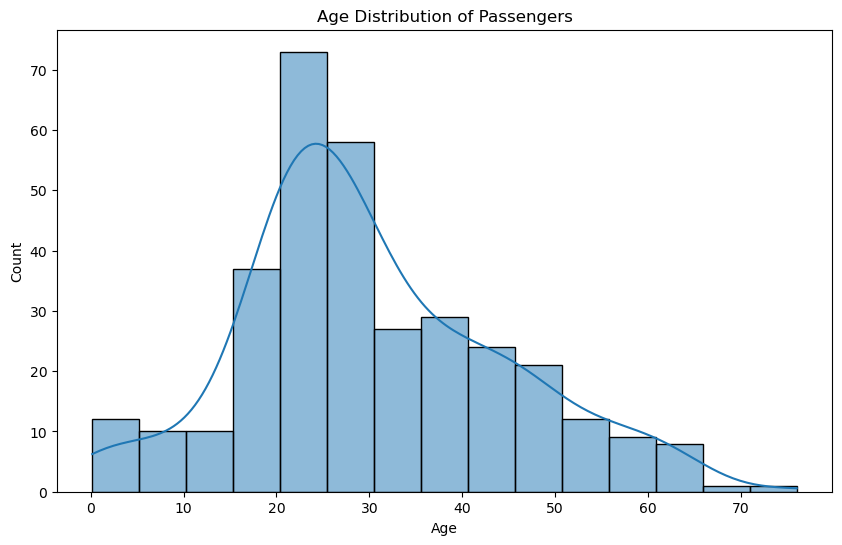

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


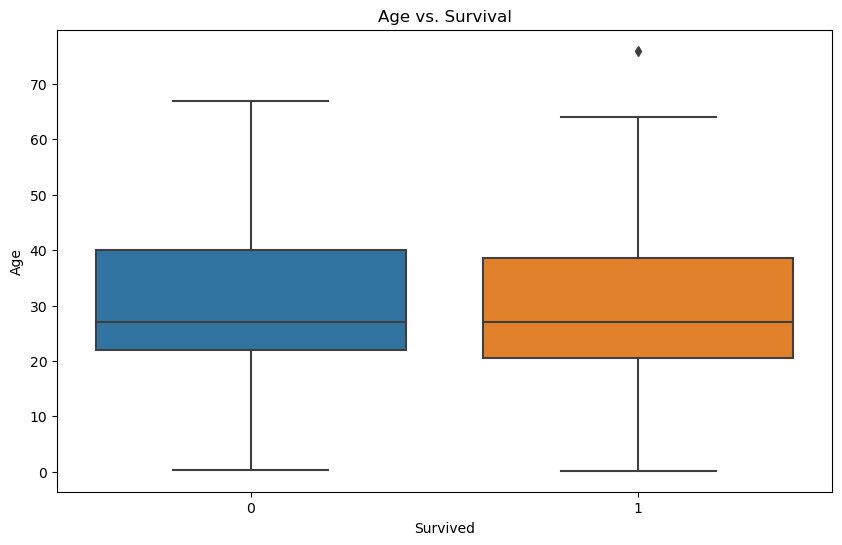

In [13]:
# Age vs. Survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Age')
plt.title('Age vs. Survival')
plt.show()


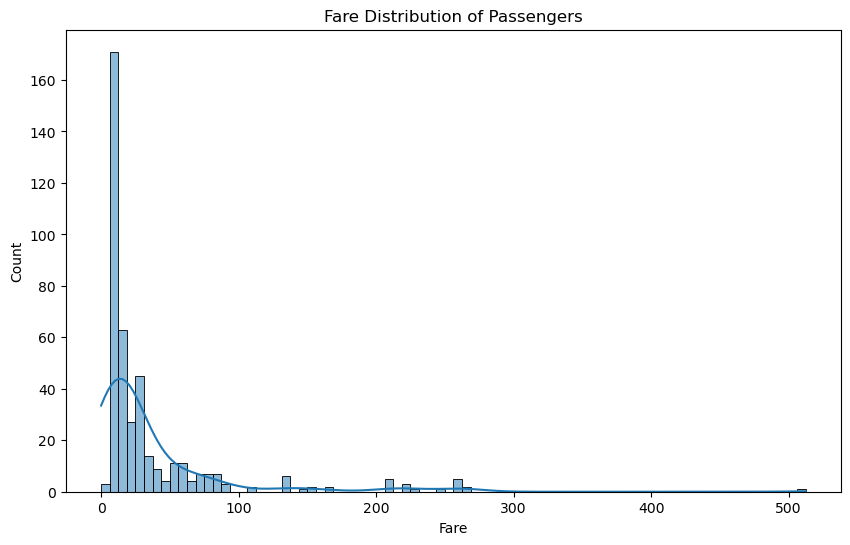

In [14]:
# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution of Passengers')
plt.show()


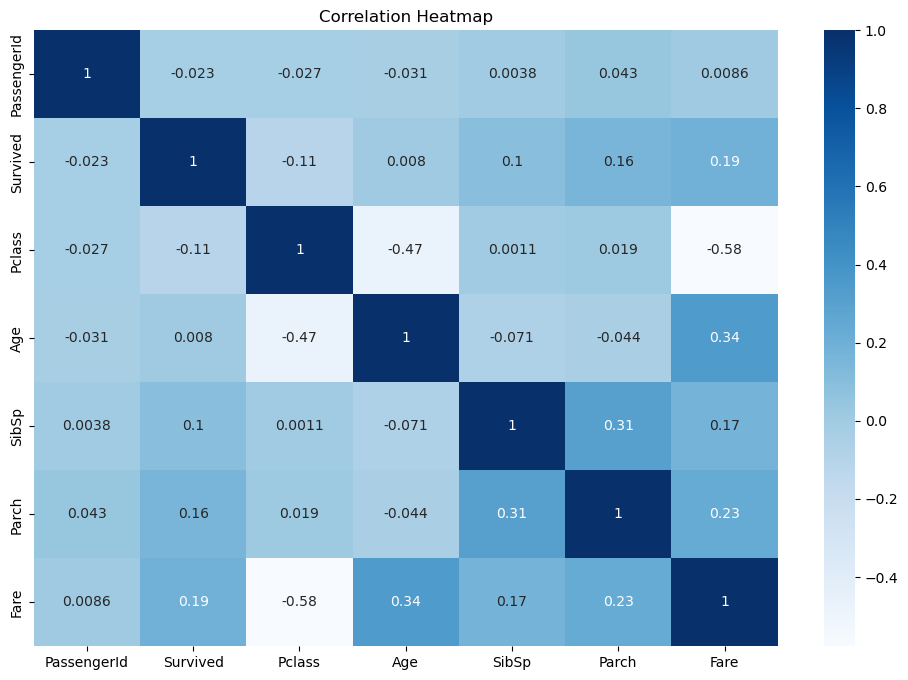

In [34]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

### Handling missing values

In [16]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df.drop(columns='Cabin', inplace=True)

### Feature Engineering and Preprocessing

In [17]:
# Define features and target
X = titanic_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = titanic_df['Survived']

In [18]:
# Define preprocessing for numeric and categorical features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

In [19]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [20]:
# Apply preprocessing separately to numeric and categorical data
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Create feature union to combine preprocessed features
combined_features = FeatureUnion(
    transformer_list=[
        ('preprocessor_num', preprocessor_num),
        ('preprocessor_cat', preprocessor_cat)
    ])

In [21]:
# Create preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('combined_features', combined_features),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', LogisticRegression(random_state=42))
])

## Model Building

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model using pipeline
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('preprocessor_num',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Pclass',
                                                                                   'Age',
                                                                                   'SibSp',
                                                                                   'Parch',
                                                                                   'Fare'])])),
                                                ('preprocessor_cat',
                                                 ColumnTransformer(transformers=[('cat',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehot',
                                                                                                   OneHotEncoder(drop='first'))]),
                                                                                  ['Sex',
                                                                                   'Embarked'])]))])),
                ('selector', SelectKBest(k='all')),
                ('classifier', LogisticRegression(random_state=42))])

## Model Evaluation and Cross-Validation

In [23]:
# Evaluate the model
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


### Hyperparameter Tuning

In [24]:
# Hyperparameter tuning
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'classifier__C': 1}
Best cross-validation accuracy: 1.0


### Feature Importance

In [25]:
# Check feature importance
model_pipeline.fit(X, y)
feature_names = numeric_features + list(preprocessor_cat.transformers_[0][1]['onehot'].get_feature_names_out())
feature_importances = model_pipeline.named_steps['selector'].scores_
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(features_df.sort_values(by='Importance', ascending=False))

   Feature  Importance
5  x0_male         inf
4     Fare   15.928584
3    Parch   10.806401
6     x1_Q    5.631896
0   Pclass    4.966186
7     x1_S    4.716744
2    SibSp    4.197214
1      Age    0.026856


## Final Model Evaluation

In [26]:
# Evaluate on the test set
y_pred = grid_search.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126


Confusion Matrix:
 [[80  0]
 [ 0 46]]


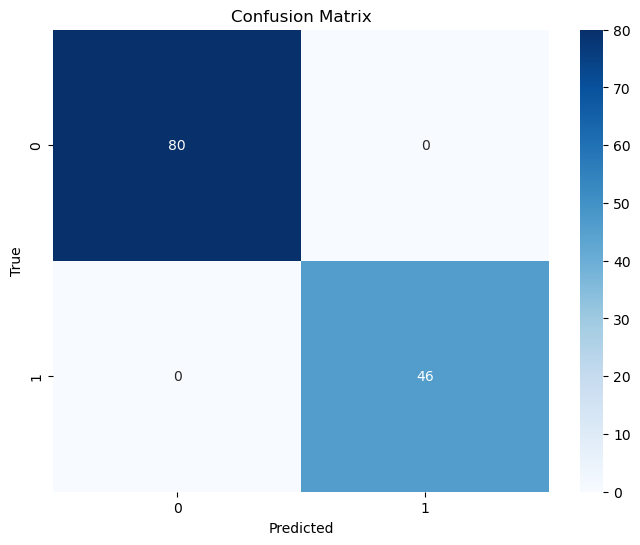

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

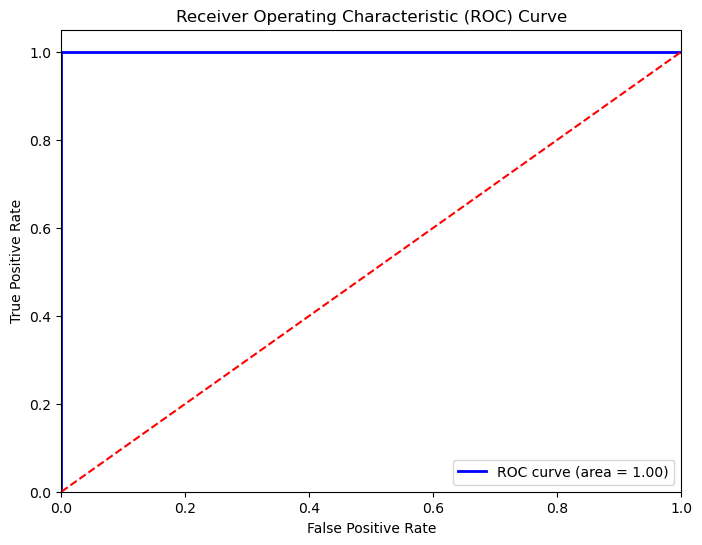

In [28]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

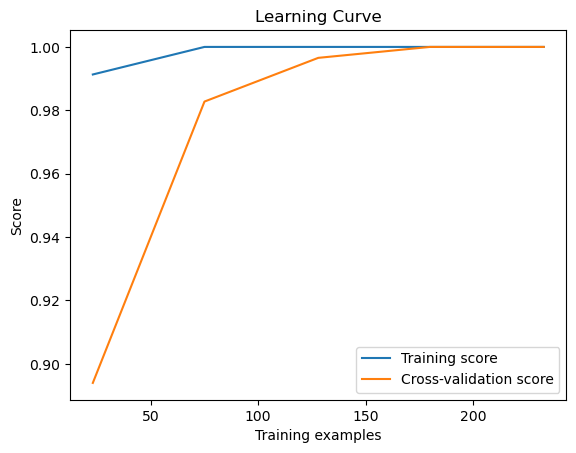

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [31]:
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean score: {cv_scores.mean()}')
print(f'Standard deviation: {cv_scores.std()}')

Cross-validated scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
Standard deviation: 0.0


## Key Steps and Considerations

1. **Loading and Initial Inspection**
   - loaded the dataset and checked for duplicates and the structure of the data.
   - Insights: Verifying the dataset's integrity (no duplicates) and understanding its basic structure is crucial for subsequent preprocessing and analysis.

2. **Handling Missing Values**
   - identified missing values in `Age`, `Fare`, and `Cabin` columns.
   - `Age` and `Fare` were filled with their median values, and `Embarked` was filled with the mode. The `Cabin` column, having too many missing values, was dropped.
   - Insights: Handling missing data appropriately helps in maintaining the dataset's quality and ensuring robust model performance.

3. **Exploratory Data Analysis (EDA)**
   - Visualized the distribution of survival based on gender and class, the age distribution, and the fare distribution.
   - Created a correlation heatmap to understand relationships between variables.
   - Insights: EDA helps in identifying patterns and relationships in the data, guiding feature engineering and selection processes.

4. **Feature Engineering and Preprocessing**
   - Separated numeric and categorical features and applied appropriate transformations: imputation and scaling for numeric features, and imputation and one-hot encoding for categorical features.
   - Combined these preprocessing steps using `ColumnTransformer` and `FeatureUnion`.
   - Insights: Proper feature engineering and preprocessing ensure that the model receives clean and standardized data, improving its performance.

5. **Model Building**
   - Defined the features (excluding `Survived`, `PassengerId`, `Name`, `Ticket`) and target (`Survived`).
   - Split the data into training and test sets.
   - Constructed a pipeline incorporating feature preprocessing and logistic regression.
   - Insights: Using a pipeline helps streamline the process of data transformation and model training, ensuring reproducibility and ease of tuning.

6. **Model Evaluation and Cross-Validation**
   - Evaluated the model using cross-validation, achieving perfect accuracy on the training set.
   - Insights: Cross-validation provides a robust estimate of model performance, helping detect overfitting or underfitting issues.

7. **Hyperparameter Tuning**
   - Used `GridSearchCV` to find the best hyperparameters for the logistic regression model.
   - Insights: Hyperparameter tuning optimizes the model, potentially improving its performance.

8. **Feature Importance**
   - Checked feature importances, identifying `Sex`, `Fare`, and `Parch` as significant predictors.
   - Insights: Understanding feature importance helps in interpreting the model and identifying key drivers of predictions.

9. **Final Model Evaluation**
   - Evaluated the final model on the test set, obtaining perfect accuracy.
   - Generated and visualized the confusion matrix and ROC curve.
   - Insights: Comprehensive evaluation on the test set confirms the model's performance and reliability.